<a href="https://colab.research.google.com/github/jogapritam/Global-Terrorism-Analysis/blob/main/NYC_Taxi_Trip_Time_Prediction_Jogapritam_Sahu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***EDA***

In [2]:
# Lets make handshake of note book with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/machine learning/Capstone Regression/NYC Taxi Data.csv')

In [4]:
# Checking dimension of data set 
dataset.shape

(1458644, 11)

In [5]:
# First look of our data 

dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# Checking column names

dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
# Brief description of our data set

dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


* From this description it is visible that trip duration has maximum value of
3526282 seconds and minium 1 second. Converting this into hours it is almost 979.5 hours.
* Here minimum passenger count is 0 and maximum passenger count is 9.



We don't want to keep the data which contains 0 passengers. So drop them.

In [8]:
dataset['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [9]:
# Lets check the taxi wich contains zero passengers

dataset[dataset['passenger_count']==0].count()



id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

The taxi that has zero passengers we don't want to keep those so drop them.

In [10]:
df=dataset[dataset['passenger_count']!=0]
df.shape

(1458584, 11)

In [11]:
# lets check the duplicate
len(df[df.duplicated()])

0

There is no duplicates in our dataset.

In [12]:
#Check for null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There is no null values, which is very good.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458584 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458584 non-null  object 
 1   vendor_id           1458584 non-null  int64  
 2   pickup_datetime     1458584 non-null  object 
 3   dropoff_datetime    1458584 non-null  object 
 4   passenger_count     1458584 non-null  int64  
 5   pickup_longitude    1458584 non-null  float64
 6   pickup_latitude     1458584 non-null  float64
 7   dropoff_longitude   1458584 non-null  float64
 8   dropoff_latitude    1458584 non-null  float64
 9   store_and_fwd_flag  1458584 non-null  object 
 10  trip_duration       1458584 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 133.5+ MB


Here store_and_fwd_flag is a categorical variable and pickup_datatime and dropoff_datetime are in string format so it's better to convert them into datetime format.

In [14]:
df['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [15]:
#Converting to date time format
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Let's check for outliers

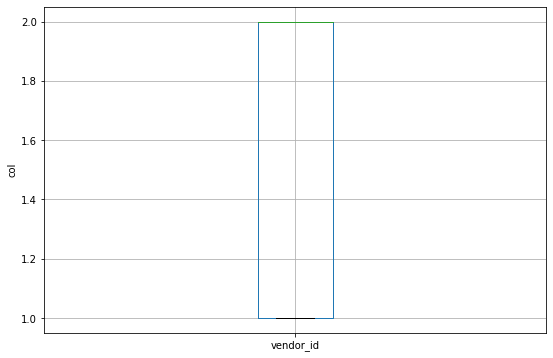

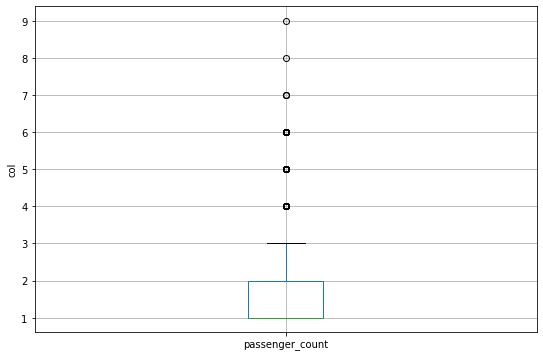

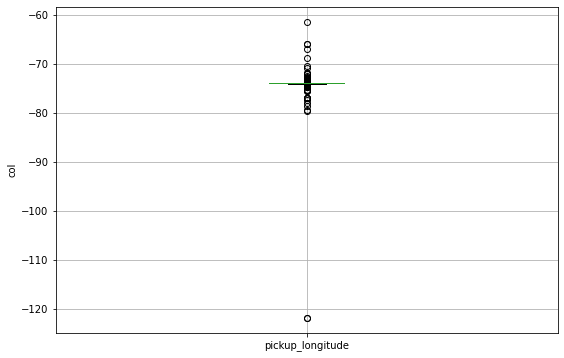

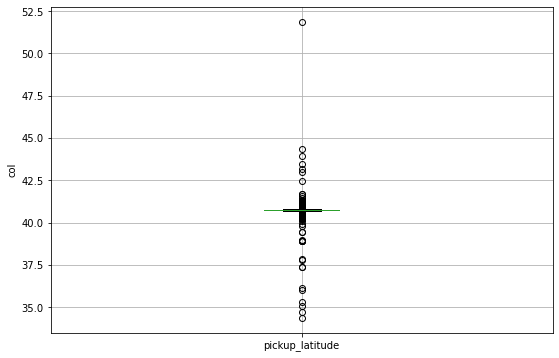

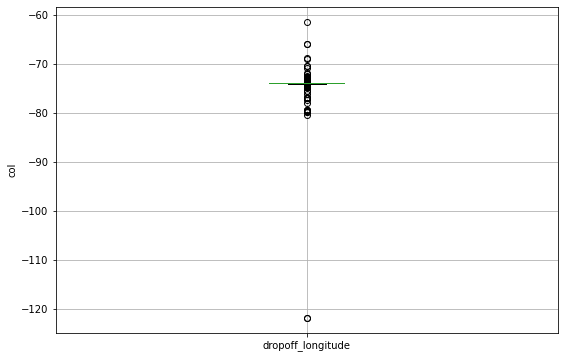

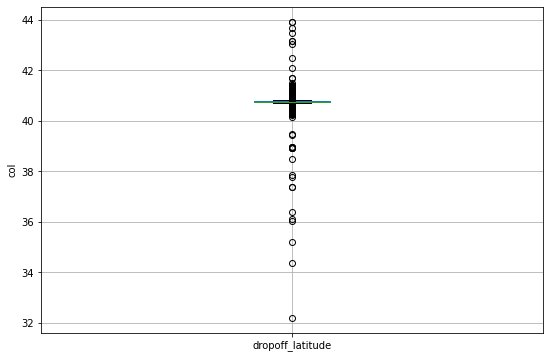

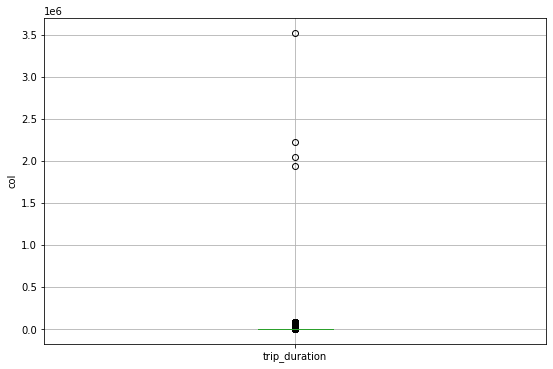

In [16]:
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = col, ax = ax)
    ax.set_ylabel("col")
plt.show()

Here it is visible that a lot of outliers are here. So we have to drop these outliers.

In [17]:
from collections import Counter
n = 1
indexes = []

for col in df.describe().columns:
  Q1 = np.percentile(df[col],25)
  Q3 = np.percentile(df[col],75)
  IQR = Q3 - Q1

  limit = 1.5 * IQR

  list_outliers = df[(df[col] < Q1 - limit) | (df[col] > Q3 + limit)].index

  indexes.extend(list_outliers)

indexes = Counter(indexes)
multiple_outliers = list(k for k, v in indexes.items() if v > n)

In [18]:
df.drop(multiple_outliers, axis = 0)
df = df.drop(multiple_outliers, axis=0).reset_index(drop=True)

In [19]:
df.shape

(1347057, 11)

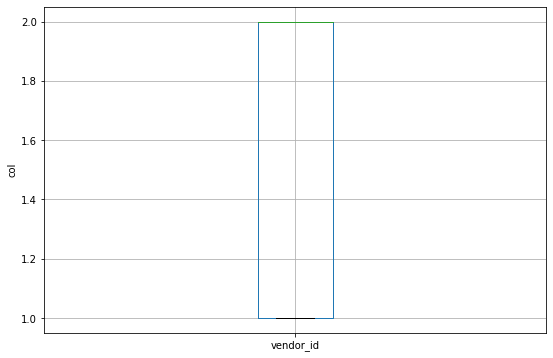

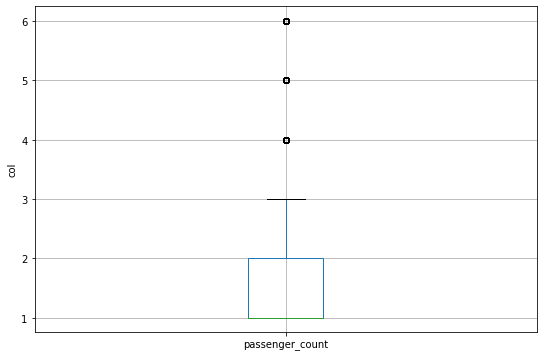

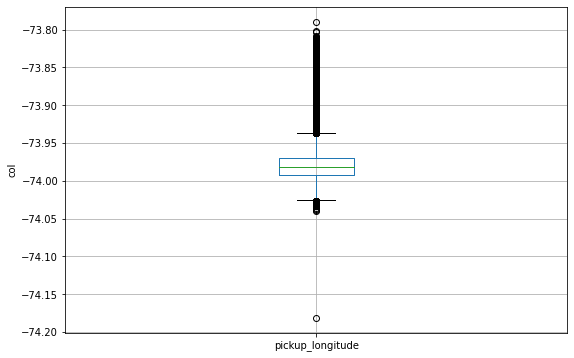

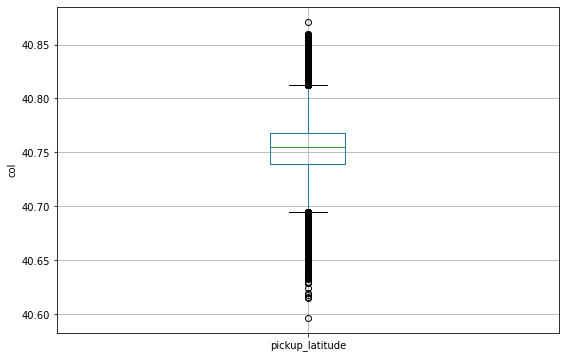

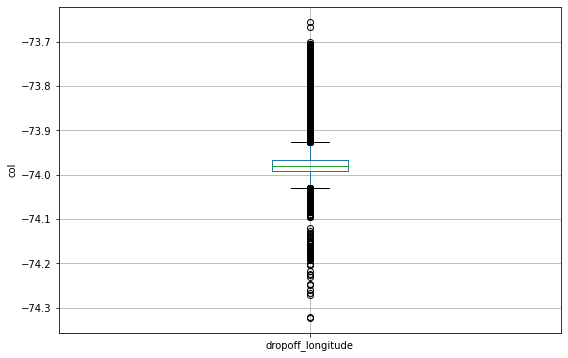

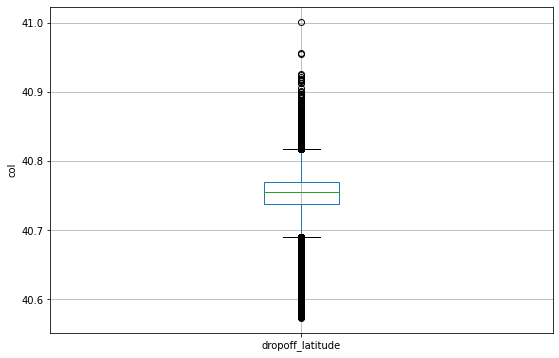

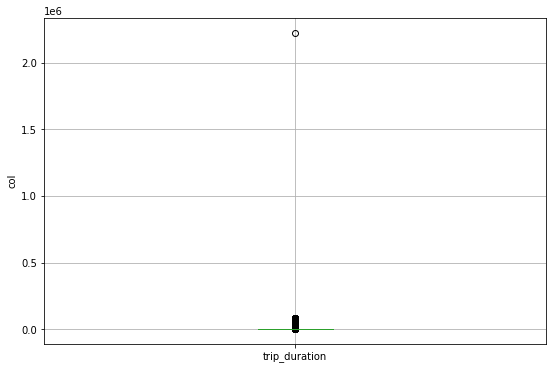

In [20]:
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = col, ax = ax)
    ax.set_ylabel("col")
plt.show()

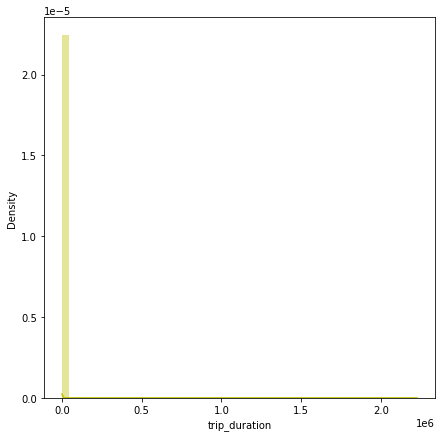

In [21]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")

Dependent Variable is not normally distributed. So apply log transformation to normalize.

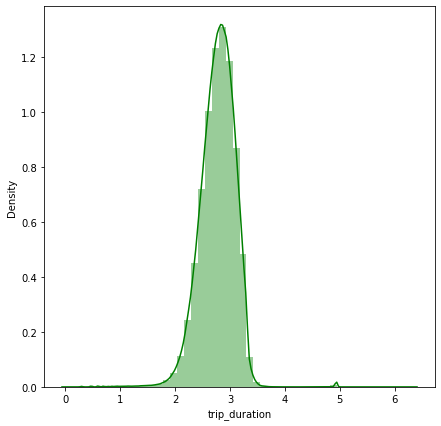

In [22]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['trip_duration']),color="g")

In [23]:
# let's check the numerical features
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

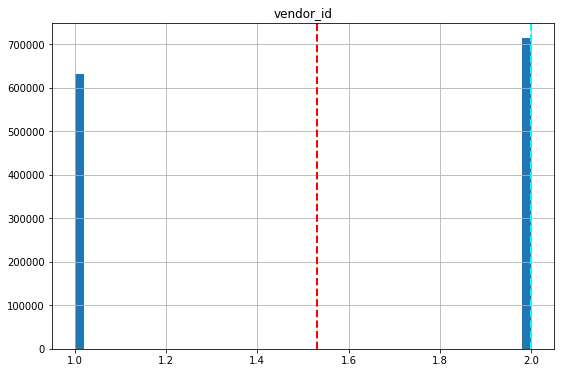

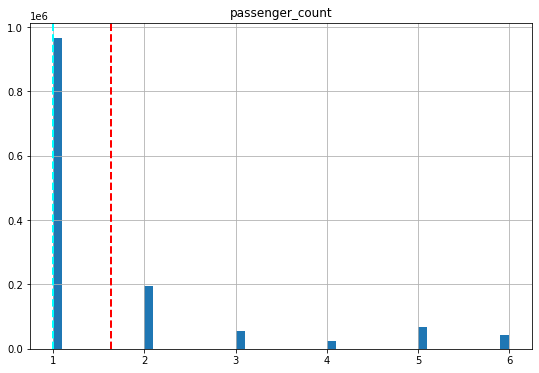

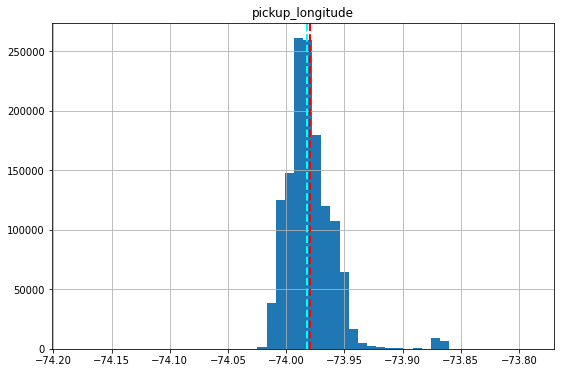

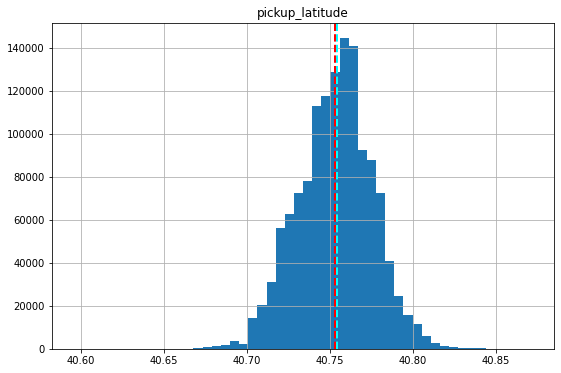

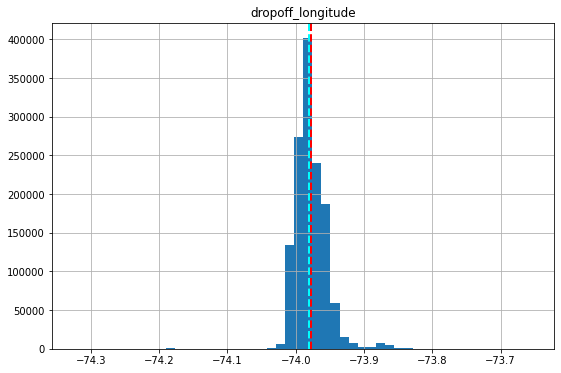

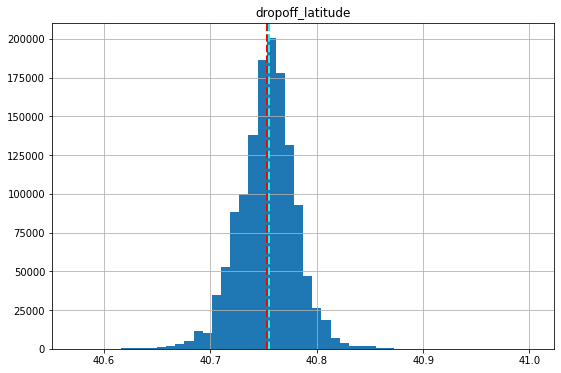

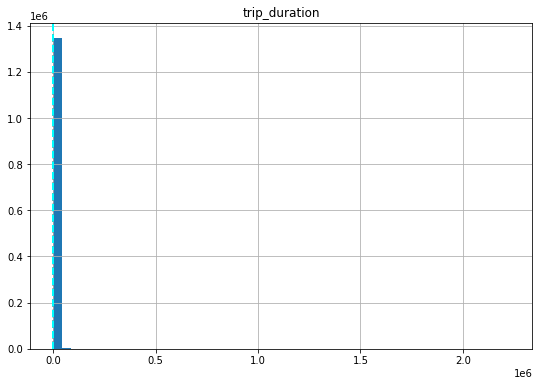

In [24]:
# plot a bar plot for each numerical feature count to check how normally our features are distributed

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

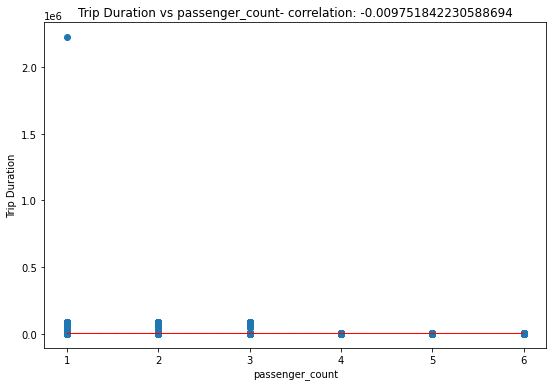

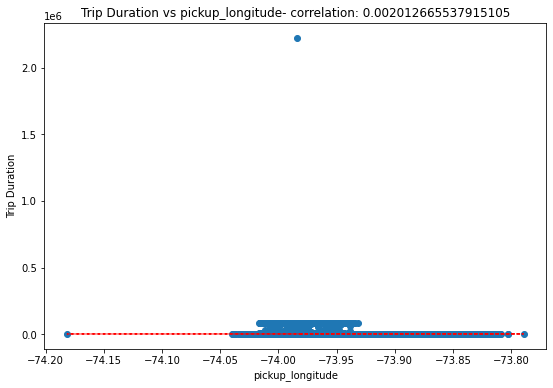

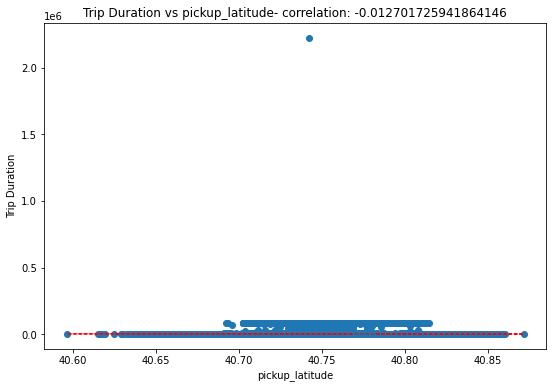

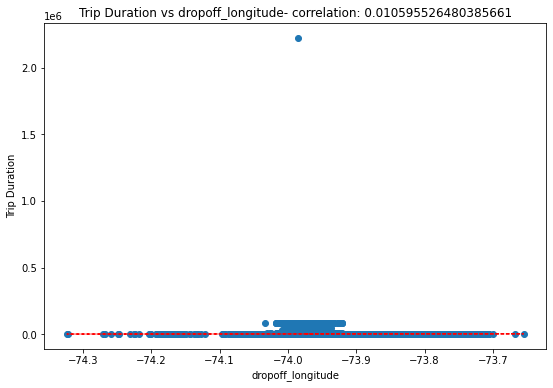

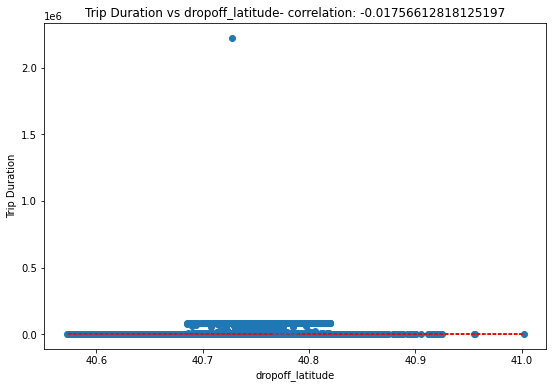

In [25]:
#Let's plot scatter plot to gain a good understanding about our features

for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip Duration')
    ax.set_title('Trip Duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

    

plt.show()

# ***Feature Engineering***

Now from pickup date time and dropoff date time we will create two new columns as pickup day and dropoff day

In [26]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Now check day wise trips

In [27]:
df['pickup_day'].value_counts()

Saturday     206464
Friday       206187
Thursday     201261
Wednesday    194686
Tuesday      187727
Sunday       179100
Monday       171632
Name: pickup_day, dtype: int64

In [28]:
df['dropoff_day'].value_counts()

Saturday     206382
Friday       205728
Thursday     200627
Wednesday    194377
Tuesday      187490
Sunday       180848
Monday       171605
Name: dropoff_day, dtype: int64

let's plot the number of pickups and number of dropoffs each day

Text(0.5, 1.0, 'Day Wise Number Of dropoffs')

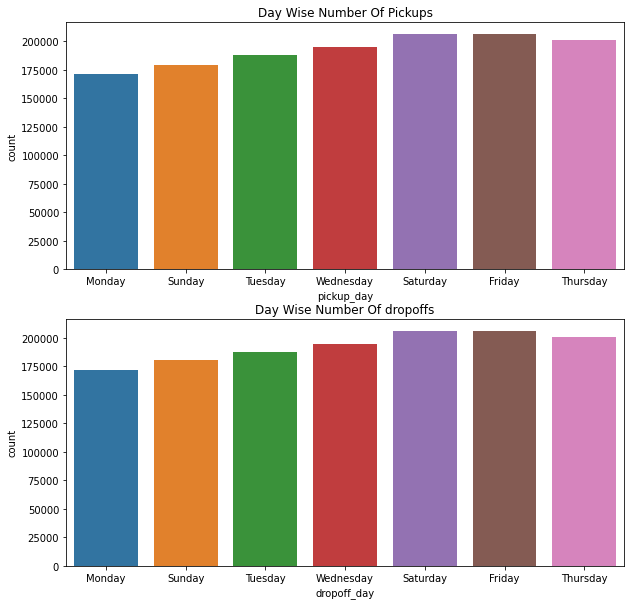

In [29]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Day Wise Number Of Pickups')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Day Wise Number Of dropoffs')

Lets create two more columns which will include coressponding months.

In [30]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [31]:
df['pickup_month'].value_counts()

3    237409
4    232799
5    227164
2    222208
6    214296
1    213181
Name: pickup_month, dtype: int64

In [32]:
df['dropoff_month'].value_counts()

3    237369
4    232788
5    227222
2    222195
6    214240
1    213151
7        92
Name: dropoff_month, dtype: int64

Let's calculate distance using given latitude and longitude

In [33]:
# vectorized haversine function
from math import cos, sin, asin, sqrt, radians
def haversine(df):
    
        lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude

        R = 3959.87433 #miles value

        dlat=radians(lat2-lat1)
        dlon=radians(lon2-lon1)
        lat1=radians(lat1)
        lat2=radians(lat2)

        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2

        return R * 2 * asin(np.sqrt(a))


In [34]:
df['distance']=df.apply(lambda x:haversine(x),axis = 1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,0.931401
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,1.122207
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,3.968637
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,0.923307
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,0.738763


In [35]:
# Now check the nomber of rows that contains 0 distance
len(df[df.distance==0])

4169

In [36]:
# drop them
df=df[df['distance']!=0]
df.shape

(1342888, 16)

We know that trip duration depends on distance as well as speed of vehicle. So create a column which will include Speed.

In [37]:
df['trip_duration_hour']=df['trip_duration']/3600

In [38]:
df['Speed']=df['distance']/df['trip_duration_hour']
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,distance,trip_duration_hour,Speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,0.931401,0.126389,7.369324
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,1.122207,0.184167,6.093432
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,3.968637,0.590000,6.726504
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,0.923307,0.119167,7.748028
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,0.738763,0.120833,6.113903


Let's make a graph between distance and dependent variable 'trip_duration_hour'

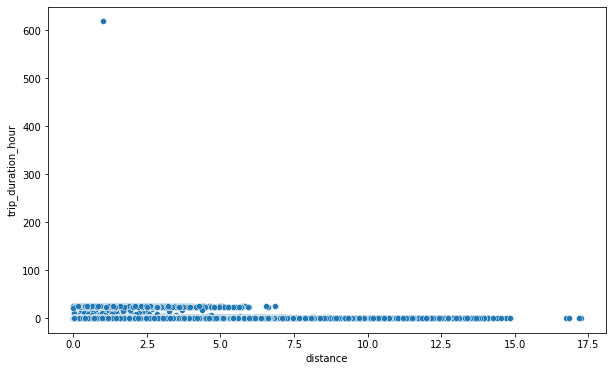

In [39]:
figure,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

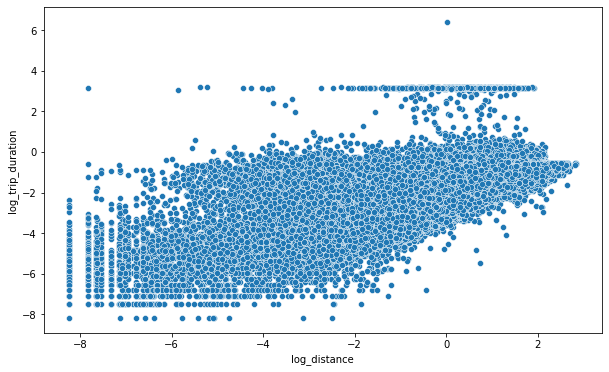

In [40]:
#Check using normalized data of both of them
df['log_trip_duration']=np.log(df.trip_duration_hour)
df['log_distance']=np.log(df.distance)
figure,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [41]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'distance', 'trip_duration_hour', 'Speed',
       'log_trip_duration', 'log_distance'],
      dtype='object')

In [42]:
df=df[['vendor_id','pickup_datetime','dropoff_datetime','passenger_count','store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','distance','trip_duration_hour','Speed']]

In [43]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,pickup_day,dropoff_day,pickup_month,dropoff_month,distance,trip_duration_hour,Speed
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,Monday,Monday,3,3,0.931401,0.126389,7.369324
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,Sunday,Sunday,6,6,1.122207,0.184167,6.093432
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,Tuesday,Tuesday,1,1,3.968637,0.590000,6.726504
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,Wednesday,Wednesday,4,4,0.923307,0.119167,7.748028
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,Saturday,Saturday,3,3,0.738763,0.120833,6.113903


In [44]:
#Let's do one hot encoding for categorical variables
df = pd.get_dummies(df, columns = ['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month'])
df.head()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,distance,trip_duration_hour,Speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,0.931401,0.126389,7.369324,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,1.122207,0.184167,6.093432,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,3.968637,0.590000,6.726504,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,0.923307,0.119167,7.748028,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,0.738763,0.120833,6.113903,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# **Linear Regression**

In [45]:
df.corr()

,vendor_id,passenger_count,distance,trip_duration_hour,Speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
vendor_id,1.000000,0.281247,-0.011766,0.022324,-0.004531,0.075405,-0.075405,-0.001178,-0.000690,0.000830,0.002912,-0.001766,0.001656,-0.001641,-0.001218,-0.000570,0.000598,0.003257,-0.001939,0.001448,-0.001448,0.004827,0.002702,0.001662,-0.002604,-0.002616,-0.003920,0.004798,0.002690,0.001718,-0.002625,-0.002623,-0.003898,-0.000497
passenger_count,0.281247,1.000000,-0.044059,-0.009810,-0.028286,0.020670,-0.020670,-0.001070,-0.009090,0.022403,0.015077,-0.008671,-0.009212,-0.009931,-0.001213,-0.009071,0.022149,0.015512,-0.008690,-0.009263,-0.009976,0.003542,-0.000409,-0.000623,0.001189,-0.001256,-0.002413,0.003567,-0.000418,-0.000635,0.001204,-0.001253,-0.002389,-0.002121
distance,-0.011766,-0.044059,1.000000,0.094185,0.496350,-0.014998,0.014998,-0.008163,0.000035,0.007639,0.040779,-0.010054,-0.015029,-0.013883,-0.008092,-0.000187,0.007914,0.041926,-0.010697,-0.015146,-0.014573,-0.006106,-0.006078,0.004404,0.002357,0.004064,0.001075,-0.006205,-0.006060,0.004351,0.002405,0.004074,0.001029,0.005324
trip_duration_hour,0.022324,-0.009810,0.094185,1.000000,-0.067004,0.000030,-0.000030,0.003097,-0.007292,-0.000640,-0.006133,0.004762,0.002925,0.002612,0.001369,-0.002648,-0.002790,-0.001589,0.003291,-0.001430,0.003587,-0.003048,-0.003802,-0.002215,0.001438,0.003202,0.004443,-0.003423,-0.003756,-0.002368,0.001442,0.003519,0.004170,0.019048
Speed,-0.004531,-0.028286,0.496350,-0.067004,1.000000,-0.003084,0.003084,-0.036793,0.029130,0.035721,0.120025,-0.054549,-0.037691,-0.050023,-0.035711,0.028935,0.036063,0.117728,-0.054277,-0.037446,-0.050214,0.020746,0.008832,0.011677,-0.009612,-0.012461,-0.019137,0.020718,0.008830,0.011703,-0.009562,-0.012526,-0.019103,-0.000602
store_and_fwd_flag_N,0.075405,0.020670,-0.014998,0.000030,-0.003084,1.000000,-1.000000,-0.001161,-0.001115,0.001776,0.003442,-0.002023,-0.000308,-0.000542,-0.000995,-0.000994,0.001910,0.003235,-0.002386,-0.000345,-0.000379,-0.000976,-0.000297,0.001567,-0.000738,0.001814,-0.001452,-0.000980,-0.000271,0.001534,-0.000711,0.001794,-0.001460,0.000588
store_and_fwd_flag_Y,-0.075405,-0.020670,0.014998,-0.000030,0.003084,-1.000000,1.000000,0.001161,0.001115,-0.001776,-0.003442,0.002023,0.000308,0.000542,0.000995,0.000994,-0.001910,-0.003235,0.002386,0.000345,0.000379,0.000976,0.000297,-0.001567,0.000738,-0.001814,0.001452,0.000980,0.000271,-0.001534,0.000711,-0.001794,0.001460,-0.000588
pickup_day_Friday,-0.001178,-0.001070,-0.008163,0.003097,-0.036793,-0.001161,0.001161,1.000000,-0.162467,-0.180866,-0.166474,-0.178156,-0.171052,-0.174742,0.985495,-0.162450,-0.165031,-0.167413,-0.177826,-0.170926,-0.174581,0.033259,-0.005592,-0.018227,0.026315,-0.020493,-0.014748,0.033287,-0.005581,-0.018195,0.026325,-0.020540,-0.014702,-0.003519
pickup_day_Monday,-0.000690,-0.009090,0.000035,-0.007292,0.029130,-0.001115,0.001115,-0.162467,1.000000,-0.162597,-0.149659,-0.160161,-0.153774,-0.157092,-0.162255,0.992606,-0.162557,-0.150502,-0.159863,-0.146435,-0.156946,-0.014056,0.030521,-0.015632,-0.013055,0.019656,-0.007288,-0.014034,0.030273,-0.015351,-0.013047,0.019610,-0.007245,-0.003163
pickup_day_Saturday,0.000830,0.022403,0.007639,-0.000640,0.035721,0.001776,-0.001776,-0.180866,-0.162597,1.000000,-0.166607,-0.178298,-0.171188,-0.174882,-0.180630,-0.162579,0.983974,-0.150358,-0.177968,-0.171062,-0.174720,-0.000453,0.001290,-0.011170,0.039066,-0.015353,-0.013888,-0.000427,0.001301,-0.011138,0.038562,-0.014882,-0.013841,-0.003522


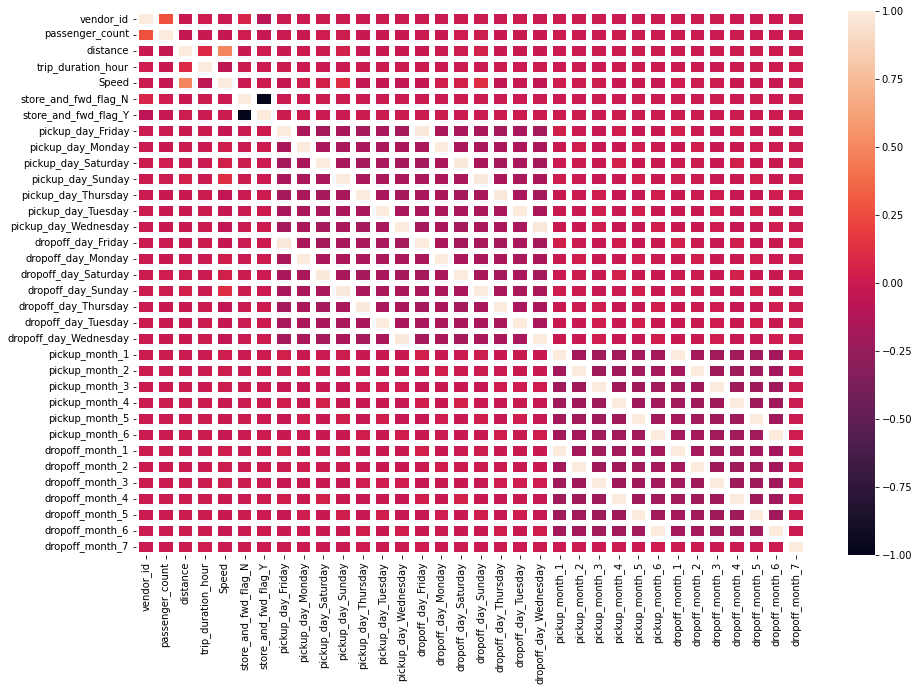

In [46]:
#Check in heatmap
plt.figure (figsize=(15,10))
sns.heatmap(df.corr(),linewidths=5)

In [47]:
final_df = df.copy()
features = ['vendor_id', 'passenger_count', 'distance',
       'Speed', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_day_Friday', 'pickup_day_Monday', 'pickup_day_Saturday',
       'pickup_day_Sunday', 'pickup_day_Thursday', 'pickup_day_Tuesday',
       'pickup_day_Wednesday', 'dropoff_day_Friday', 'dropoff_day_Monday',
       'dropoff_day_Saturday', 'dropoff_day_Sunday', 'dropoff_day_Thursday',
       'dropoff_day_Tuesday', 'dropoff_day_Wednesday', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'dropoff_month_1', 'dropoff_month_2',
       'dropoff_month_3', 'dropoff_month_4', 'dropoff_month_5',
       'dropoff_month_6', 'dropoff_month_7', 'trip_duration_hour']

In [48]:
from scipy.stats import zscore
X = df[features].apply(zscore)

In [49]:
X

,vendor_id,passenger_count,distance,Speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,trip_duration_hour
0,0.941757,-0.494676,-0.527237,-0.265346,0.071013,-0.071013,-0.425114,2.616615,-0.425453,-0.391599,-0.419079,-0.402367,-0.411048,-0.424559,2.616896,-0.425349,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,2.161810,-0.457103,-0.450422,-0.434879,-0.433538,-0.444456,2.162032,-0.457090,-0.450491,-0.434811,-0.008277,-0.110916
1,-1.061845,-0.494676,-0.392954,-0.551075,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,2.553631,-0.419079,-0.402367,-0.411048,-0.424559,-0.382132,-0.425349,2.539314,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,-0.462575,-0.457103,-0.450422,2.299492,-0.433538,-0.444456,-0.462528,-0.457090,-0.450491,2.299851,-0.008277,-0.048301
2,0.941757,-0.494676,1.610254,-0.409302,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,-0.391599,-0.419079,2.485295,-0.411048,-0.424559,-0.382132,-0.425349,-0.393807,-0.418301,2.487125,-0.410668,2.306411,-0.444472,-0.462575,-0.457103,-0.450422,-0.434879,2.306605,-0.444456,-0.462528,-0.457090,-0.450491,-0.434811,-0.008277,0.391507
3,0.941757,-0.494676,-0.532933,-0.180538,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,-0.391599,-0.419079,-0.402367,2.432804,-0.424559,-0.382132,-0.425349,-0.393807,-0.418301,-0.402071,2.435056,-0.433574,-0.444472,-0.462575,2.187691,-0.450422,-0.434879,-0.433538,-0.444456,-0.462528,2.187753,-0.450491,-0.434811,-0.008277,-0.118742
4,0.941757,-0.494676,-0.662807,-0.546490,0.071013,-0.071013,-0.425114,-0.382173,2.350435,-0.391599,-0.419079,-0.402367,-0.411048,-0.424559,-0.382132,2.351008,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,2.161810,-0.457103,-0.450422,-0.434879,-0.433538,-0.444456,2.162032,-0.457090,-0.450491,-0.434811,-0.008277,-0.116936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347052,0.941757,1.855767,-0.646845,-1.126620,0.071013,-0.071013,2.352311,-0.382173,-0.425453,-0.391599,-0.419079,-0.402367,-0.411048,2.355383,-0.382132,-0.425349,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,-0.462575,2.187691,-0.450422,-0.434879,-0.433538,-0.444456,-0.462528,2.187753,-0.450491,-0.434811,-0.008277,-0.013682
1347053,-1.061845,-0.494676,1.463603,2.712602,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,2.553631,-0.419079,-0.402367,-0.411048,-0.424559,-0.382132,-0.425349,2.539314,-0.418301,-0.402071,-0.410668,2.306411,-0.444472,-0.462575,-0.457103,-0.450422,-0.434879,2.306605,-0.444456,-0.462528,-0.457090,-0.450491,-0.434811,-0.008277,-0.050709
1347054,0.941757,-0.494676,2.239925,3.216318,0.071013,-0.071013,2.352311,-0.382173,-0.425453,-0.391599,-0.419079,-0.402367,-0.411048,2.355383,-0.382132,-0.425349,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,-0.462575,2.187691,-0.450422,-0.434879,-0.433538,-0.444456,-0.462528,2.187753,-0.450491,-0.434811,-0.008277,-0.017897
1347055,-1.061845,-0.494676,-0.704811,-0.447907,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,-0.391599,-0.419079,2.485295,-0.411048,-0.424559,-0.382132,-0.425349,-0.393807,-0.418301,2.487125,-0.410668,2.306411,-0.444472,-0.462575,-0.457103,-0.450422,-0.434879,2.306605,-0.444456,-0.462528,-0.457090,-0.450491,-0.434811,-0.008277,-0.135600


In [50]:
y = np.log10(df['trip_duration_hour'])

In [ ]:
y

0         -0.898291
1         -0.734789
2         -0.229148
3         -0.923845
4         -0.917813
             ...   
1347052   -0.665323
1347053   -0.740061
1347054   -0.673209
1347055   -0.984594
1347056   -1.259637
Name: trip_duration_hour, Length: 1342888, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1074310, 34)
(268578, 34)


In [52]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [53]:
reg.score(X_train, y_train)

0.7161117907419173

In [54]:
reg.coef_

array([ 1.48147397e-03,  3.36119583e-03,  2.81192534e-01, -1.88655773e-01,
       -3.52433912e+09, -3.52433912e+09, -1.88766731e+10, -1.74832415e+10,
       -1.88871256e+10, -1.78011677e+10, -1.86893313e+10, -1.81560551e+10,
       -1.84357458e+10,  3.92088276e+09,  3.63445404e+09,  3.92594585e+09,
        3.71611943e+09,  3.88042875e+09,  3.77261690e+09,  3.83024813e+09,
        1.03890338e+10,  1.05650607e+10,  1.08466528e+10,  1.07629559e+10,
        1.06591035e+10,  1.04103649e+10,  4.79766251e+10,  4.87911668e+10,
        5.00894570e+10,  4.97053173e+10,  4.92316542e+10,  4.80727767e+10,
        1.08808280e+09,  5.25299784e-02])

In [55]:
y_pred = reg.predict(X_test)

In [56]:
y_pred

array([-0.80360944, -0.79645771, -1.12375735, ..., -0.95186455,
       -0.79239145, -0.81048155])

In [57]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.2612487967741455
RMSE : 0.5111250304711612


In [58]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5172857465251819
Adjusted R2 :  0.5172246304855974


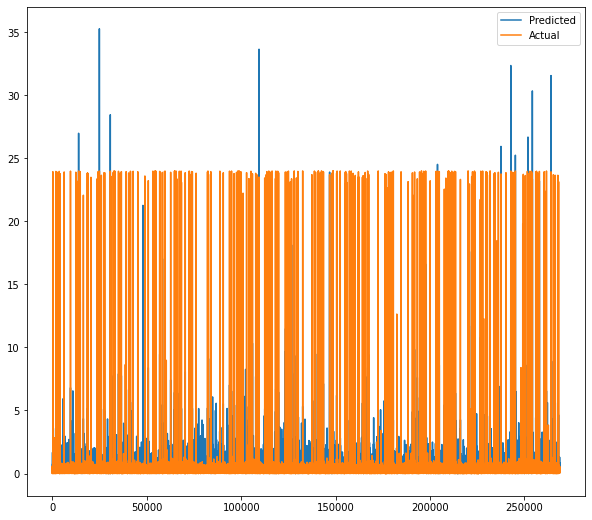

In [59]:
plt.figure(figsize=(10,9))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# ***Apply lasso to our model***

In [60]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso.score(X_train, y_train)

0.7160441567382905

In [62]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [63]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.029252783530280796


In [64]:
y_pred_lasso = lasso_regressor.predict(X_test)

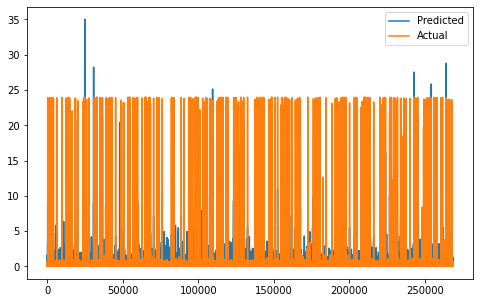

In [65]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [66]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.27182870056766534
RMSE : 0.5213719407176276
R2 : 0.497737061805537
Adjusted R2 :  0.4976734707236671


# ***Apply ridge to our model***

In [67]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [68]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -0.029264513150841536


In [69]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [70]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.26128948006242364
RMSE : 0.5111648267070257
R2 : 0.5172105752578973
Adjusted R2 :  0.5171494497009428


# ***Decision Trees***

In [71]:
X = df[features]

In [72]:
y = final_df['trip_duration_hour']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [74]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
Reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10, random_state=0)
Reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [75]:
y_predicted = reg.predict(X_test)

In [76]:
y_predicted[:10]

array([4.08760980e+10, 4.24505910e+10, 4.04578816e+10, 4.26028682e+10,
       4.25176311e+10, 4.26028682e+10, 4.21350315e+10, 4.26028682e+10,
       3.98801400e+10, 4.02358221e+10])

In [77]:
y_test[:10]

1240585    0.147500
250482     0.536389
656282     0.360278
690549     0.115000
240895     0.147778
39385      0.396944
1245066    0.164444
96471      0.164722
1020250    0.152778
682806     0.291111
Name: trip_duration_hour, dtype: float64

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

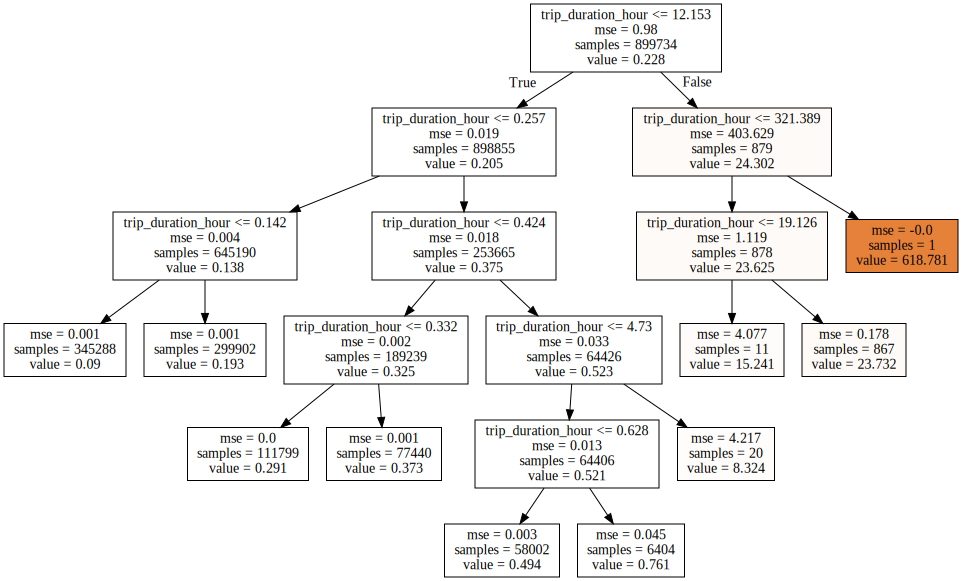

In [79]:
graph = Source(tree.export_graphviz(Reg, out_file=None, feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

In [80]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(Reg, X_train,y_train, cv=10))
print('Accuracy of Test Data :', cross_val_score(Reg, X_test,y_test, cv=10))
predicted=Reg.predict(X_test[:3])
print(predicted)

Accuracy of Train Data : [0.99665184 0.99725213 0.99726248 0.99709449 0.99663318 0.99647691
 0.18877382 0.99668487 0.9971508  0.99734177]
Accuracy of Test Data : [0.99803477 0.99838827 0.99770963 0.99787559 0.99669836 0.99870768
 0.99751272 0.9969323  0.99751153 0.996615  ]
[0.19343572 0.49425061 0.37329683]
